In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer


In [64]:
train_dataset = pd.read_csv("datasets/sign_mnist_train.csv")
test_dataset = pd.read_csv("datasets/sign_mnist_train.csv")
y = test_dataset['label']

In [13]:
train_dataset.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


C:\Users\HP\.conda\envs\tensor\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

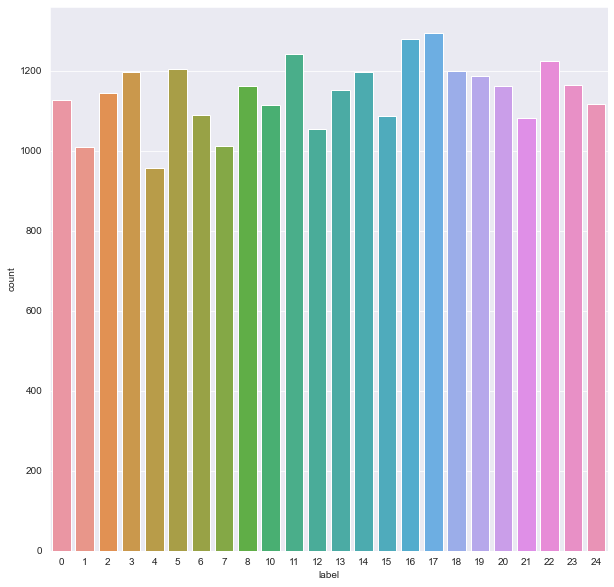

In [15]:
plt.figure(figsize = (10,10)) # Label Count
sns.set_style("darkgrid")
sns.countplot(train_dataset['label'])

In [18]:
y_train = train_dataset['label']
y_test = test_dataset['label']
del train_dataset['label']
del test_dataset['label']

In [19]:
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [20]:
y_train[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [21]:
x_train = train_dataset.values
x_test = test_dataset.values
x_train[0]

array([107, 118, 127, 134, 139, 143, 146, 150, 153, 156, 158, 160, 163,
       165, 159, 166, 168, 170, 170, 171, 171, 171, 172, 171, 171, 170,
       170, 169, 111, 121, 129, 135, 141, 144, 148, 151, 154, 157, 160,
       163, 164, 170, 119, 152, 171, 171, 170, 171, 172, 172, 172, 172,
       172, 171, 171, 170, 113, 123, 131, 137, 142, 145, 150, 152, 155,
       158, 161, 163, 164, 172, 105, 142, 170, 171, 171, 171, 172, 172,
       173, 173, 172, 171, 171, 171, 116, 125, 133, 139, 143, 146, 151,
       153, 156, 159, 162, 163, 167, 167,  95, 144, 171, 172, 172, 172,
       172, 172, 173, 173, 173, 172, 172, 171, 117, 126, 134, 140, 145,
       149, 153, 156, 158, 161, 163, 164, 175, 156,  87, 154, 172, 173,
       173, 173, 173, 173, 174, 174, 174, 173, 172, 172, 119, 128, 136,
       142, 146, 150, 153, 156, 159, 163, 165, 164, 184, 148,  89, 164,
       172, 174, 174, 174, 174, 175, 175, 174, 175, 174, 173, 173, 122,
       130, 138, 143, 147, 150, 154, 158, 162, 165, 166, 172, 18

In [23]:
x_train = x_train/255
x_test = x_test/255
x_train[0]

array([0.41960784, 0.4627451 , 0.49803922, 0.5254902 , 0.54509804,
       0.56078431, 0.57254902, 0.58823529, 0.6       , 0.61176471,
       0.61960784, 0.62745098, 0.63921569, 0.64705882, 0.62352941,
       0.65098039, 0.65882353, 0.66666667, 0.66666667, 0.67058824,
       0.67058824, 0.67058824, 0.6745098 , 0.67058824, 0.67058824,
       0.66666667, 0.66666667, 0.6627451 , 0.43529412, 0.4745098 ,
       0.50588235, 0.52941176, 0.55294118, 0.56470588, 0.58039216,
       0.59215686, 0.60392157, 0.61568627, 0.62745098, 0.63921569,
       0.64313725, 0.66666667, 0.46666667, 0.59607843, 0.67058824,
       0.67058824, 0.66666667, 0.67058824, 0.6745098 , 0.6745098 ,
       0.6745098 , 0.6745098 , 0.6745098 , 0.67058824, 0.67058824,
       0.66666667, 0.44313725, 0.48235294, 0.51372549, 0.5372549 ,
       0.55686275, 0.56862745, 0.58823529, 0.59607843, 0.60784314,
       0.61960784, 0.63137255, 0.63921569, 0.64313725, 0.6745098 ,
       0.41176471, 0.55686275, 0.66666667, 0.67058824, 0.67058

In [25]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
x_train[0]

array([[[0.41960784],
        [0.4627451 ],
        [0.49803922],
        [0.5254902 ],
        [0.54509804],
        [0.56078431],
        [0.57254902],
        [0.58823529],
        [0.6       ],
        [0.61176471],
        [0.61960784],
        [0.62745098],
        [0.63921569],
        [0.64705882],
        [0.62352941],
        [0.65098039],
        [0.65882353],
        [0.66666667],
        [0.66666667],
        [0.67058824],
        [0.67058824],
        [0.67058824],
        [0.6745098 ],
        [0.67058824],
        [0.67058824],
        [0.66666667],
        [0.66666667],
        [0.6627451 ]],

       [[0.43529412],
        [0.4745098 ],
        [0.50588235],
        [0.52941176],
        [0.55294118],
        [0.56470588],
        [0.58039216],
        [0.59215686],
        [0.60392157],
        [0.61568627],
        [0.62745098],
        [0.63921569],
        [0.64313725],
        [0.66666667],
        [0.46666667],
        [0.59607843],
        [0.67058824],
        

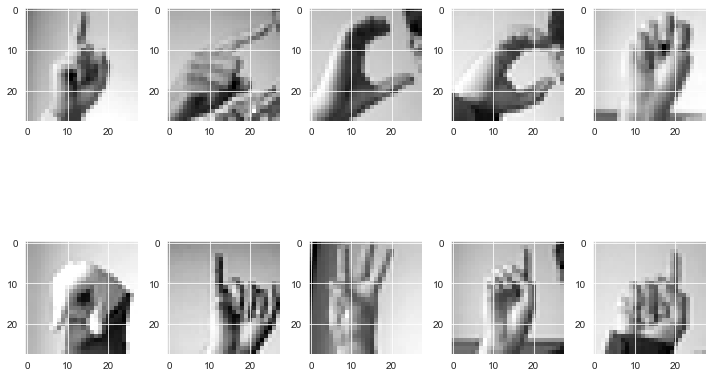

In [26]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()    

In [29]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.1,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)
datagen.fit(x_train)

In [68]:
model = keras.Sequential()
model.add((Conv2D(filters=75, kernel_size = (3,3), padding="same", activation="relu", input_shape=(28,28,1)) ) )
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding="same"))

model.add((Conv2D(filters=50, kernel_size = (3,3), padding="same", activation="relu") ) )
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding="same"))

model.add((Conv2D(filters=25, kernel_size = (3,3), padding="same", activation="relu") ) )
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding="same"))

model.add(Flatten())
model.add(Dense(units = 512, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(units = 24, activation = "softmax"))

In [73]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [74]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 50)         

In [75]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=25, validation_data = (x_test, y_test))

Train for 429 steps, validate on 27455 samples
Epoch 1/25
429/429 [==============================] - 88s 205ms/step - loss: 0.2921 - accuracy: 0.9020 - val_loss: 0.3023 - val_accuracy: 0.9008
Epoch 2/25
429/429 [==============================] - 90s 210ms/step - loss: 0.1027 - accuracy: 0.9649 - val_loss: 0.0866 - val_accuracy: 0.9721
Epoch 3/25
429/429 [==============================] - 107s 249ms/step - loss: 0.0674 - accuracy: 0.9773 - val_loss: 0.0888 - val_accuracy: 0.9709
Epoch 4/25
429/429 [==============================] - 105s 245ms/step - loss: 0.0497 - accuracy: 0.9826 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 5/25
429/429 [==============================] - 105s 245ms/step - loss: 0.0398 - accuracy: 0.9868 - val_loss: 4.7186 - val_accuracy: 0.4677
Epoch 6/25
429/429 [==============================] - 105s 246ms/step - loss: 0.0347 - accuracy: 0.9894 - val_loss: 0.0108 - val_accuracy: 0.9960
Epoch 7/25
429/429 [==============================] - 120s 279ms/step - loss: 0

In [76]:
model.evaluate(x_test, y_test)

27455/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.00015586086416359768, 1.0]

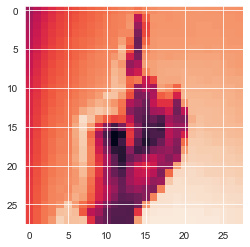

In [37]:
plt.imshow(x_test[0])

In [77]:
model.predict(x_test[0:3])

array([[1.5034876e-21, 2.0549487e-18, 8.3889012e-17, 9.9999940e-01,
        3.1202462e-23, 1.2392756e-14, 2.4147482e-15, 2.8509360e-14,
        3.7406487e-15, 5.0408901e-13, 5.8043713e-07, 3.9902912e-16,
        3.2929736e-15, 8.5318990e-18, 2.6538376e-19, 1.4103099e-17,
        6.5732164e-10, 2.5354954e-22, 2.6037077e-09, 1.6223477e-12,
        2.2095200e-08, 3.4399083e-18, 1.1778173e-08, 2.4482761e-17],
       [1.5067294e-25, 1.0274746e-29, 2.9602359e-17, 5.9963546e-25,
        1.2568565e-32, 3.2126656e-26, 1.0000000e+00, 4.8535950e-11,
        1.7881295e-28, 2.8855207e-27, 3.6138213e-14, 4.5367915e-27,
        5.5456902e-21, 2.7587596e-24, 2.3281933e-23, 1.0317387e-24,
        6.5917675e-24, 3.9252733e-29, 4.8219240e-16, 2.4819875e-26,
        2.5325738e-25, 6.6188459e-34, 1.7725686e-15, 1.1534074e-20],
       [2.4892569e-36, 1.5935448e-31, 1.0000000e+00, 1.7431726e-36,
        8.4560971e-30, 7.0318414e-27, 6.2040920e-18, 1.0036680e-24,
        0.0000000e+00, 0.0000000e+00, 2.348691

In [57]:
y_test[0:3]

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]])

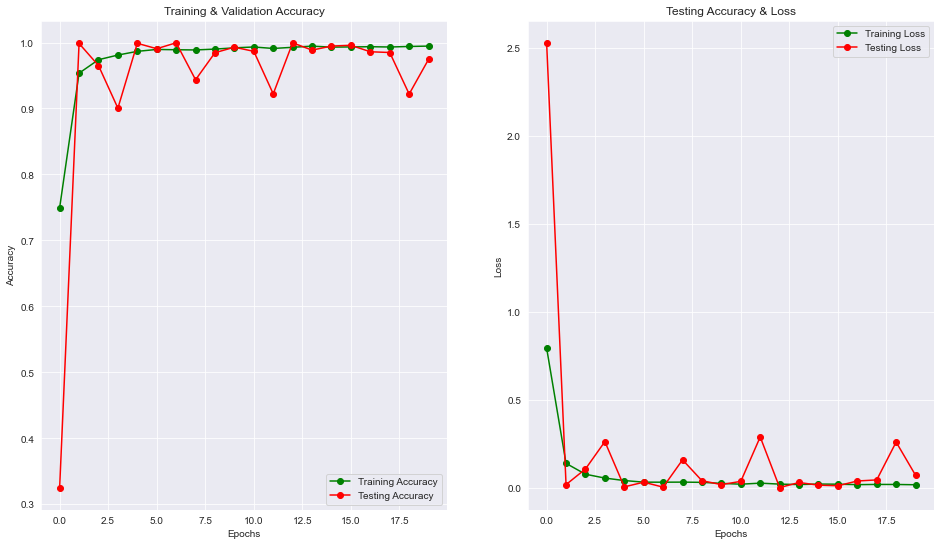

In [59]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [62]:
predictions = model.predict_classes(x_test)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1
predictions[:5]        

array([11, 11,  3, 11, 11], dtype=int64)

In [67]:
correct = np.nonzero(predictions == y)[0]
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.imshow(x_test[c].reshape(28,28), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y[c]))
    plt.tight_layout()
    i += 1


ValueError: Length of passed values is 1, index implies 27455.